In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
xl = pd.ExcelFile("Error_WholeData_abs.xlsx", engine='openpyxl')
a=xl.sheet_names
#loading the data set
dataframe_collection = {}
i=0
for i in range(1):
        dataframe_collection[i] = xl.parse(a[i])

dataframe_collection[0][dataframe_collection[0]< 0] = 0
#df1= dataframe_collection[0][305:801]
df1= dataframe_collection[0][310:685]
#df1= dataframe_collection[0][675:854]
df1

,Unnamed: 0,Modelflow,Obsflow,Error,NWM_min,NWM_max,ML_1min,ML_1max,ML_2min,ML_2max
310,310,227.721245,240.126863,252.302425,184.429996,261.099994,0.0,480.023670,0.0,732.326095
311,311,230.199995,214.641700,255.141336,195.669996,252.729994,0.0,485.341331,0.0,740.482666
312,312,229.039995,162.255533,253.812733,198.799996,261.199994,0.0,482.852727,0.0,736.665460
313,313,250.550619,168.768408,270.101841,213.819995,289.659994,0.0,520.652460,0.0,790.754301
314,314,262.597494,156.025827,278.577344,230.769995,285.879994,0.0,541.174838,0.0,819.752182
...,...,...,...,...,...,...,...,...,...,...
680,680,180.700621,106.471345,198.449607,176.449996,187.579996,0.0,379.150228,0.0,577.599836
681,681,178.176871,158.008006,195.559171,171.449996,183.909996,0.0,373.736042,0.0,569.295213
682,682,174.890621,156.308995,191.795424,167.929996,187.239996,0.0,366.686046,0.0,558.481470
683,683,171.851871,119.780263,188.315121,165.619996,177.949996,0.0,360.166992,0.0,548.482112


In [2]:
import numpy as np
res_ML=df1["Obsflow"].between(df1["ML_2min"],df1["ML_2max"])
count_ML = np.count_nonzero(res_ML)
prob_ML=count_ML/len(df1)
prob_ML = round(prob_ML, 2)


res_NWM=df1["Obsflow"].between(df1["NWM_min"],df1["NWM_max"])
count_NWM= np.count_nonzero(res_NWM)
prob_NWM=count_NWM/len(df1)
prob_NWM = round(prob_NWM, 2)



In [3]:
date_to_omit=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 21, 28, 35, 45, 46, 68, 92, 93, 94, 95, 100, 101, 102, 104, 115, 116, 117, 118, 131, 133, 134, 135, 146, 147, 167, 168, 169, 170, 173, 178, 179, 191, 195, 199, 200, 201, 219, 225, 232, 251, 254, 256, 257, 258, 259, 260, 261, 262, 275, 276, 277, 314, 317, 318, 319, 320, 321, 322, 323, 324, 348, 368, 419, 420,421, 446,452, 453, 454, 456, 457, 480, 508, 624, 625, 626, 700,712, 791, 841, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884,885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898,899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 933,934]
a=pd.date_range(start="2018-12-11",end="2021-08-15").to_list()
print(len(a))

for index in sorted(date_to_omit, reverse=True):
    del a[index]


979


In [4]:
#b=pd.to_datetime(a[305:801])
b=pd.to_datetime(a[310:685])
#b=pd.to_datetime(a[675:854])
b
df1.index=b

df1

In [5]:
df1

,Unnamed: 0,Modelflow,Obsflow,Error,NWM_min,NWM_max,ML_1min,ML_1max,ML_2min,ML_2max
2019-12-29,310,227.721245,240.126863,252.302425,184.429996,261.099994,0.0,480.023670,0.0,732.326095
2019-12-30,311,230.199995,214.641700,255.141336,195.669996,252.729994,0.0,485.341331,0.0,740.482666
2019-12-31,312,229.039995,162.255533,253.812733,198.799996,261.199994,0.0,482.852727,0.0,736.665460
2020-01-01,313,250.550619,168.768408,270.101841,213.819995,289.659994,0.0,520.652460,0.0,790.754301
2020-01-02,314,262.597494,156.025827,278.577344,230.769995,285.879994,0.0,541.174838,0.0,819.752182
...,...,...,...,...,...,...,...,...,...,...
2021-01-18,680,180.700621,106.471345,198.449607,176.449996,187.579996,0.0,379.150228,0.0,577.599836
2021-01-19,681,178.176871,158.008006,195.559171,171.449996,183.909996,0.0,373.736042,0.0,569.295213
2021-01-20,682,174.890621,156.308995,191.795424,167.929996,187.239996,0.0,366.686046,0.0,558.481470
2021-01-21,683,171.851871,119.780263,188.315121,165.619996,177.949996,0.0,360.166992,0.0,548.482112


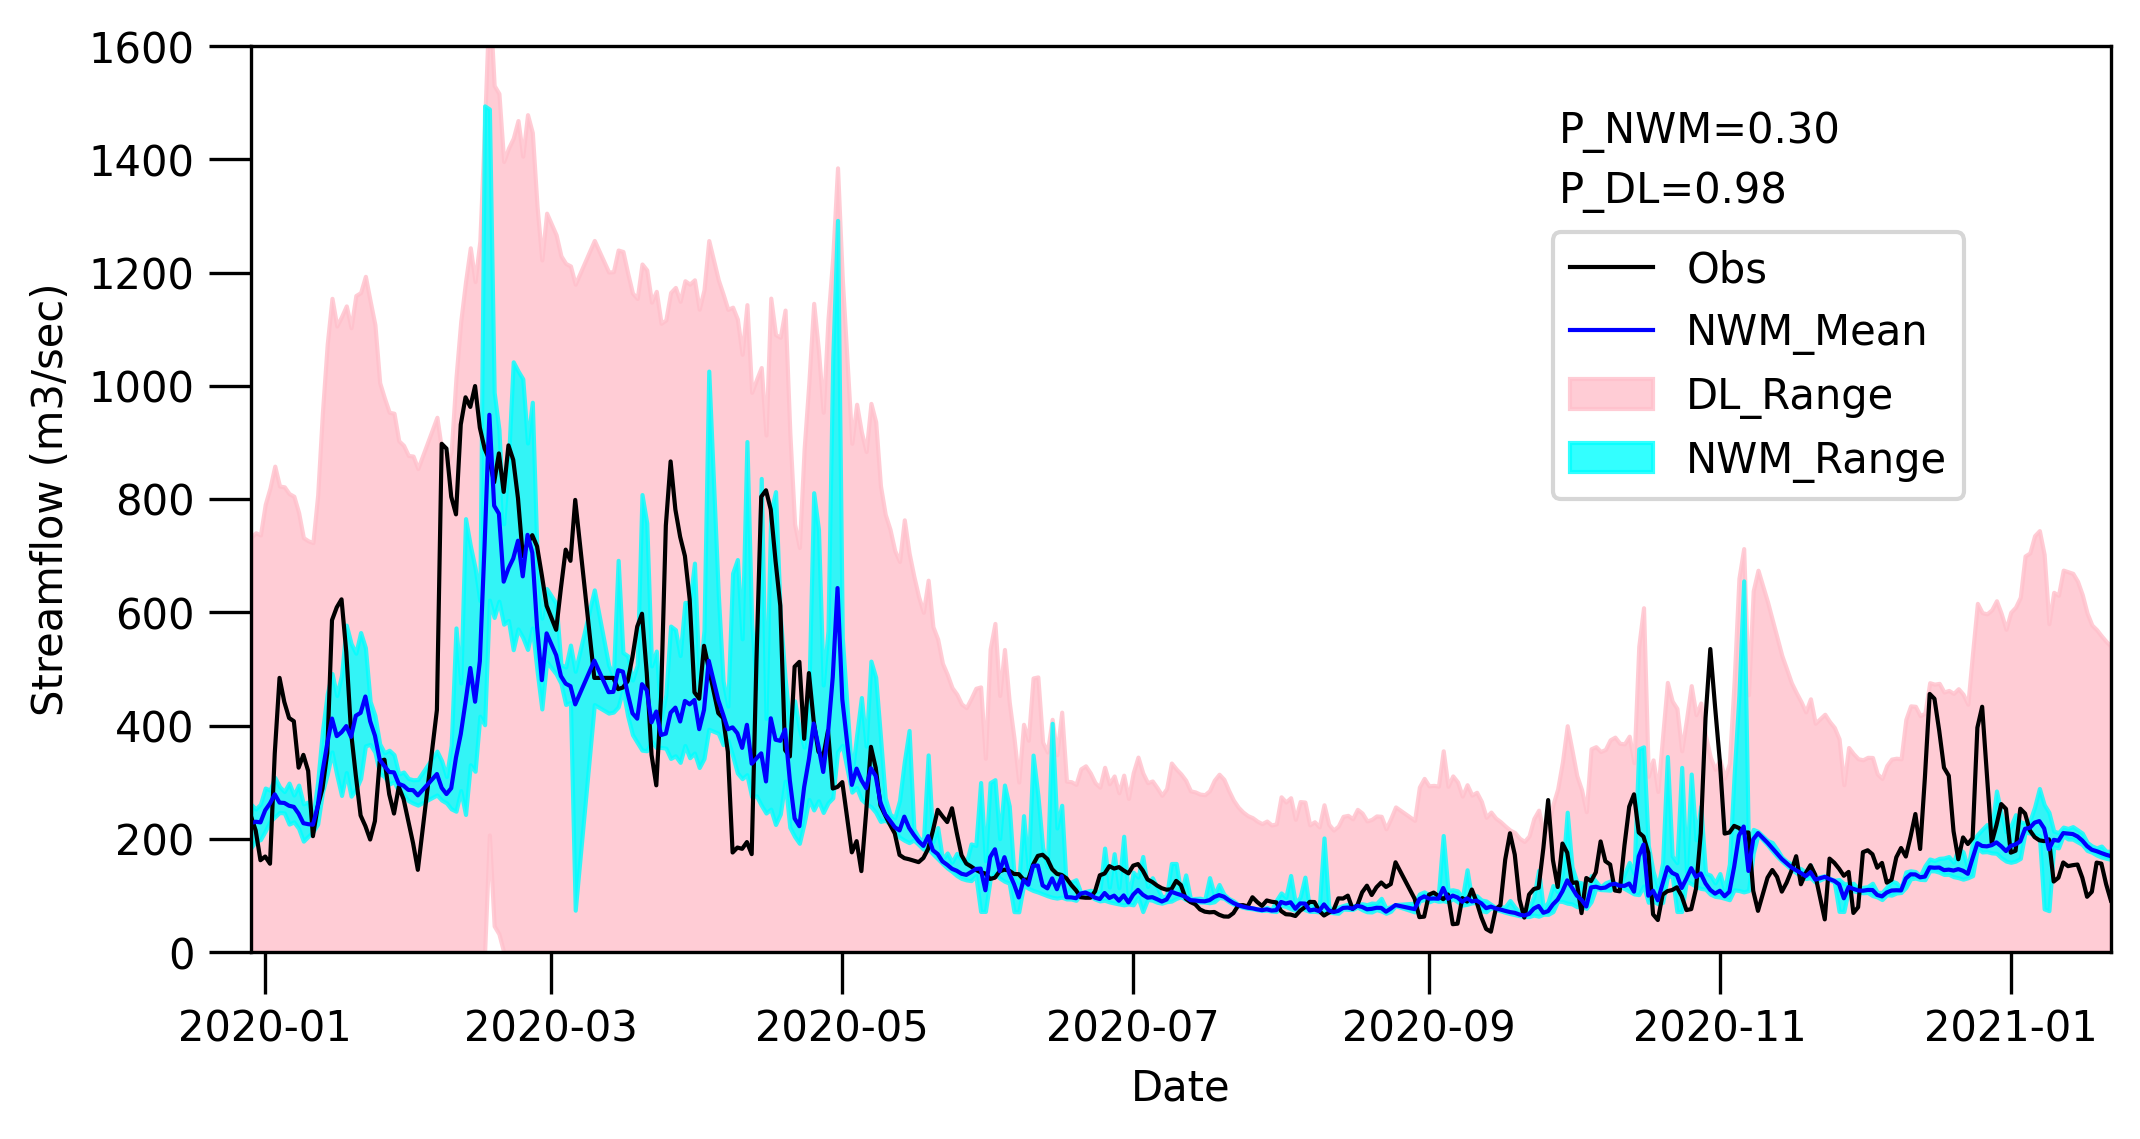

In [6]:
fig = plt.figure(figsize=(3.54,3.54), dpi=300)

plt.plot(df1['Obsflow'], 'k', linewidth=1, label='Obs',alpha=1.0)
plt.plot(df1['Modelflow'], 'b', linewidth=1, label='NWM_Mean',alpha=1.0) 
plt.fill_between(b, df1['ML_2min'],df1['ML_2max'],label='DL_Range',  color='pink', alpha=0.8)
plt.fill_between(b, df1['NWM_min'],df1['NWM_max'],label='NWM_Range',  color='cyan', alpha=0.8)

plt.legend(loc=(0.7, 0.5), fontsize=10)


plt.figtext(.67, .75, "P_DL=%.2f"%(prob_ML))
plt.figtext(.67, .8, "P_NWM=%.2f"%(prob_NWM))

fig.set_size_inches(8, 4)

plt.xlabel("TimeStamps")
plt.ylabel("Streamflow")

#plt.axhline(y=0, color='k',linewidth=2)
#plt.axvline(x=0, color='k',linewidth=2)
fig.set_size_inches(8, 4)
plt.xlabel("Date")
plt.ylabel("Streamflow (m3/sec)")


plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
plt.ylim(0, 1600)
plt.xlim(df1.index[0], df1.index[374])


fig.set_facecolor('white')
#ax = plt.axes()


plt.show()


fig.savefig('fig13(a).png',bbox_inches='tight')

#2nd Plot


PLOT for 1b

In [7]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_ungagued.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_NWM_0-30.csv',delimiter = ',')

df1["plus"]=df1["Pred"] +  df1["Std_err"]
df1["minus"]=df1["Pred"] -  df1["Std_err"]
#df1["plus"]=df1["Pred"] +  df1["Std"]
#df1["minus"]=df1["Pred"] -  df1["Std"]
df1[df1< 0] = 0
df1[df1>1 ] = 1


df2["plus"]=df2["Pred"] +  df2["Std_err"]
df2["minus"]=df2["Pred"] -  df2["Std_err"]
#df2["plus"]=df2["Pred"] +  df2["Std"]
#df2["minus"]=df2["Pred"] -  df2["Std"]

df2[df2< 0] = 0
df2[df2>1 ] = 1

df2

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])

df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])


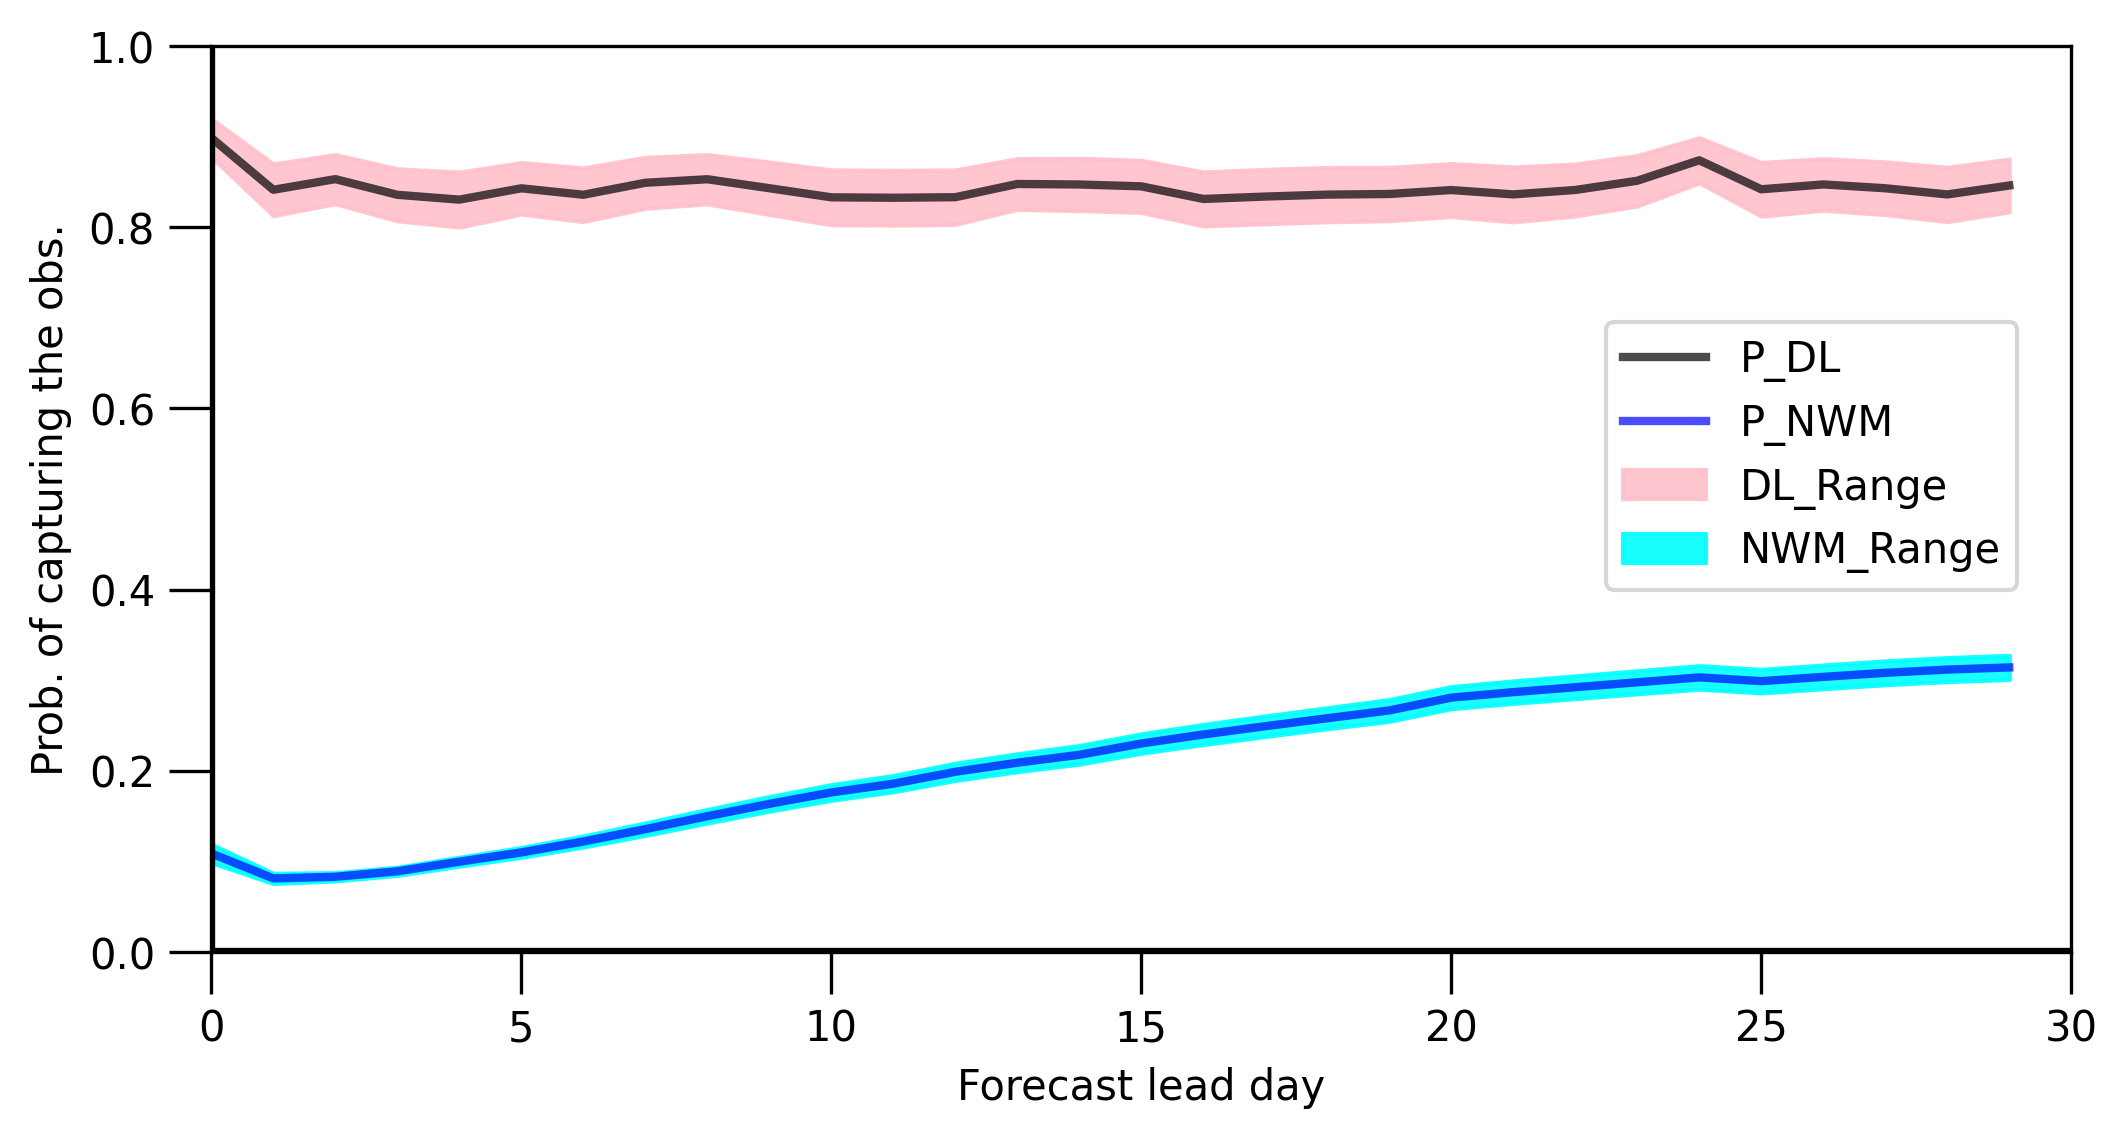

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df1['Pred'], 'k', linewidth=2, label='P_DL',alpha=0.7)
plt.plot(df2['Pred'], 'b', linewidth=2, label='P_NWM',alpha=0.7) 
plt.fill_between(df1.index, df1['plus'],df1['minus'],label='DL_Range',  color='pink', alpha=0.9)
plt.fill_between(df1.index, df2['plus'],df2['minus'],label='NWM_Range',  color='cyan', alpha=0.9)
plt.legend(loc=(0.9, 0.9), fontsize=10)
plt.xlabel("Lead day",fontsize=10)
plt.ylabel("Probability of Capturing Obsflow",fontsize=10)
plt.axhline(y=0, color='k',linewidth=2)
plt.axvline(x=0, color='k',linewidth=2)

plt.legend(loc=(0.75, 0.4), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)
#fig.set_backgroundcolor('white')
plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
plt.ylim(0, 1.0)
plt.xlim(0, 30)
#plt.axhline(y=0, color='black',linewidth=1)
#plt.axvline(x=df1.index[0], color='black',linewidth=1)

plt.show()
fig.savefig('fig13(b).png', bbox_inches='tight')

#3rd Graph


In [9]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_lnd1.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_lnd2.csv',delimiter = ',')
df3 = pd.read_csv('prediction_std_stderr_probability_lnd3.csv',delimiter = ',')

df1['prob_plus'] = df1['Pred']+df1['Std_err']
df1['prob_minus'] = df1['Pred']-df1['Std_err']

df2['prob_plus'] = df2['Pred']+df1['Std_err']
df2['prob_minus'] = df2['Pred']-df1['Std_err']

df3['prob_plus'] = df3['Pred']+df3['Std_err']
df3['prob_minus'] = df3['Pred']-df3['Std_err']

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])
df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])
df3=df3.drop(columns=[df3.columns[0],df3.columns[2],df3.columns[3]])

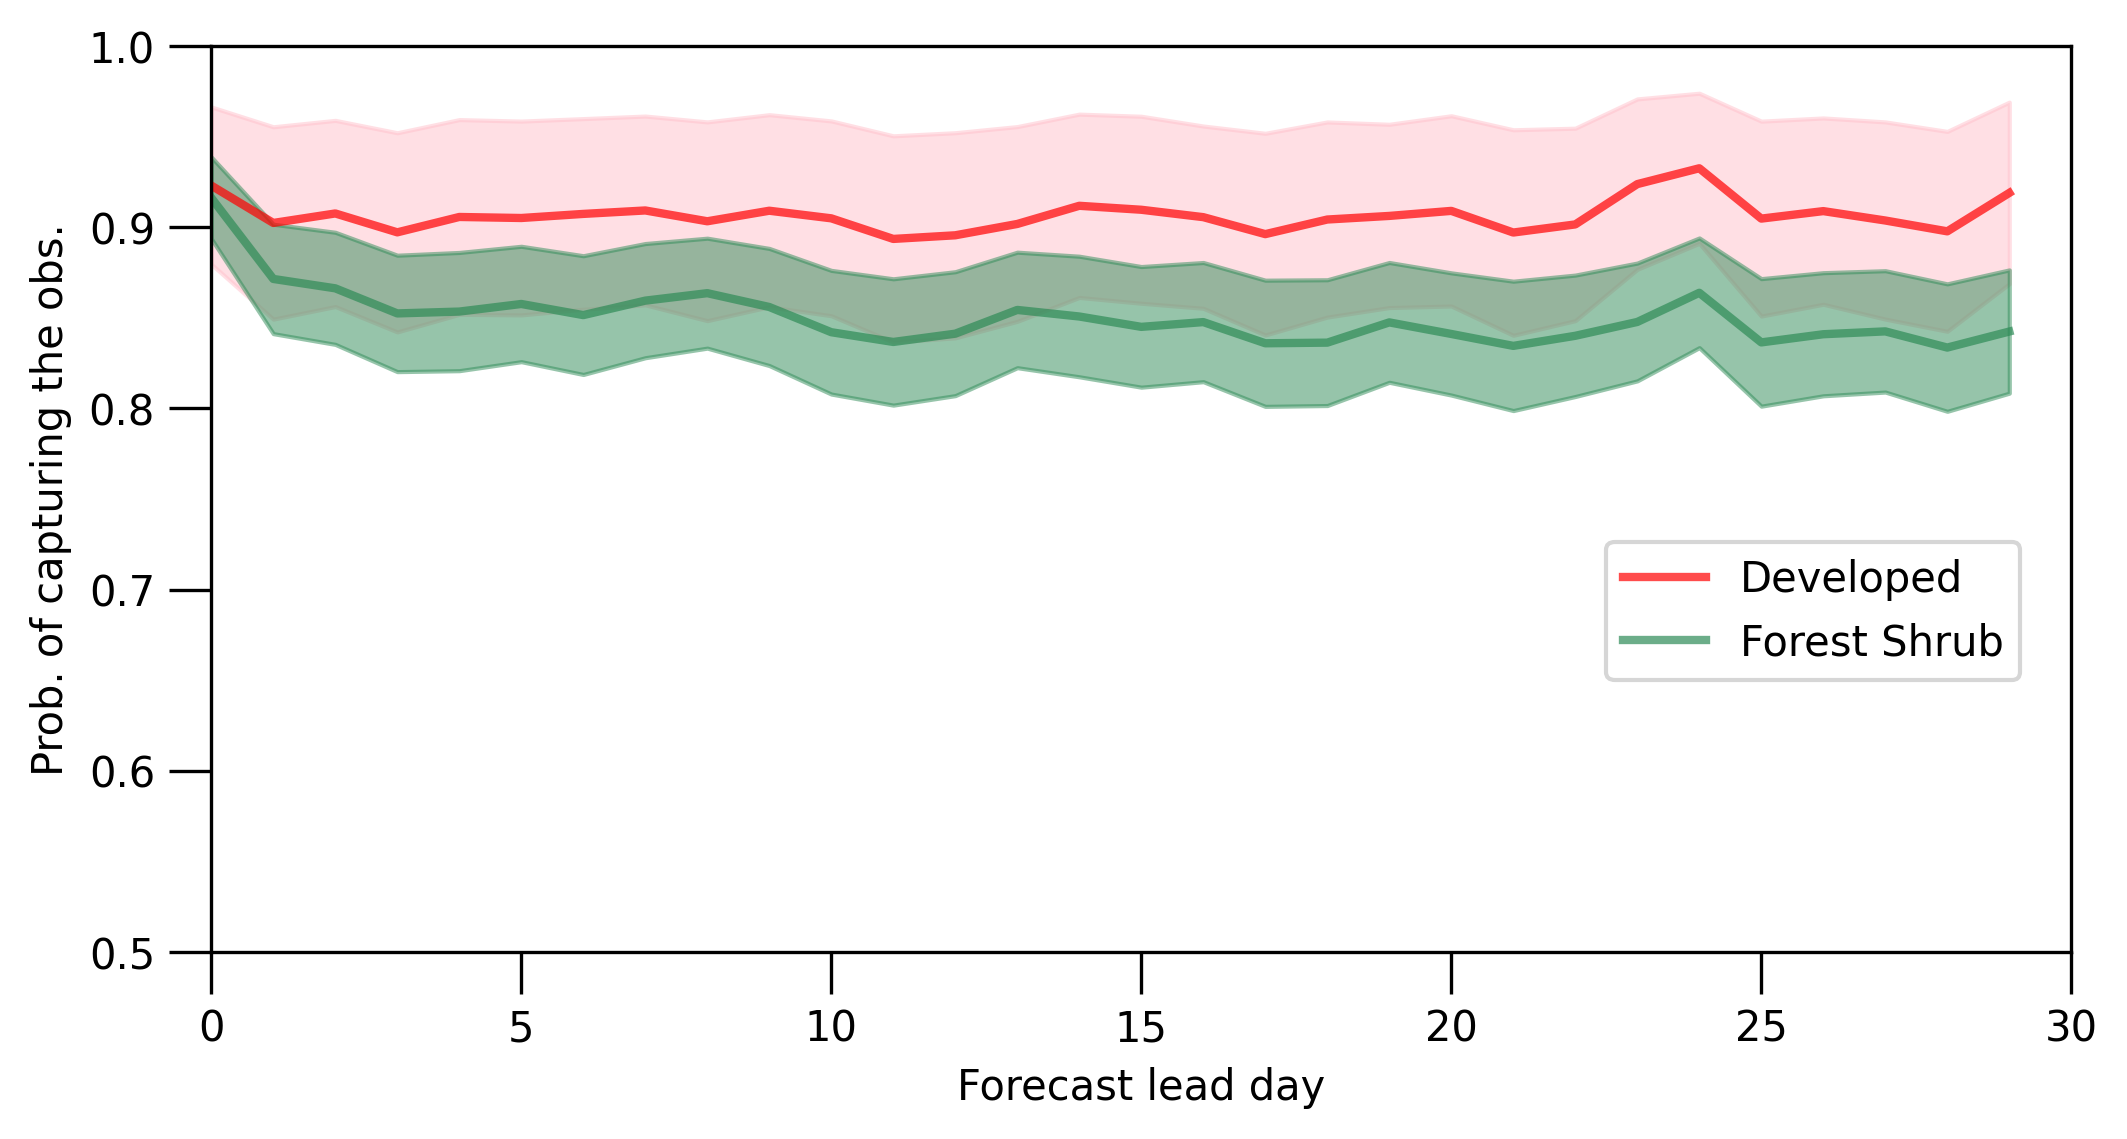

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df1['Pred'], 'r', linewidth=2, label='Developed',alpha=0.7)
plt.plot(df3['Pred'], 'seagreen', linewidth=2, label='Forest Shrub',alpha=0.7)

plt.fill_between(df1.index, df1['prob_plus'],df1['prob_minus'],  color='pink', alpha=0.5)
plt.fill_between(df3.index, df3['prob_plus'],df3['prob_minus'],  color='seagreen', alpha=0.5)
#plt.legend(loc=(0.9, 0.9), fontsize=10)
#plt.xlabel("Lead day",fontsize=10)
#plt.ylabel("Probability of Capturing Obsflow",fontsize=10)

#plt.show()
#fig.savefig('fig3_rev_01_08.png', bbox_inches='tight')
plt.legend(loc=(0.75, 0.3), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)
plt.xlim(0.0, 30.0)
plt.ylim(0.5, 1.0)
plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
#plt.axhline(y=0.5, color='black',linewidth=1)
#plt.axvline(x=0, color='black',linewidth=1)

plt.show()
fig.savefig('fig14(a).png', bbox_inches='tight')

In [11]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_less_2.5.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_grt.csv',delimiter = ',')


df1['prob_plus'] = df1['Pred']+df1['Std_err']
df1['prob_minus'] = df1['Pred']-df1['Std_err']

df2['prob_plus'] = df2['Pred']+df1['Std_err']
df2['prob_minus'] = df2['Pred']-df1['Std_err']

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])
df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])


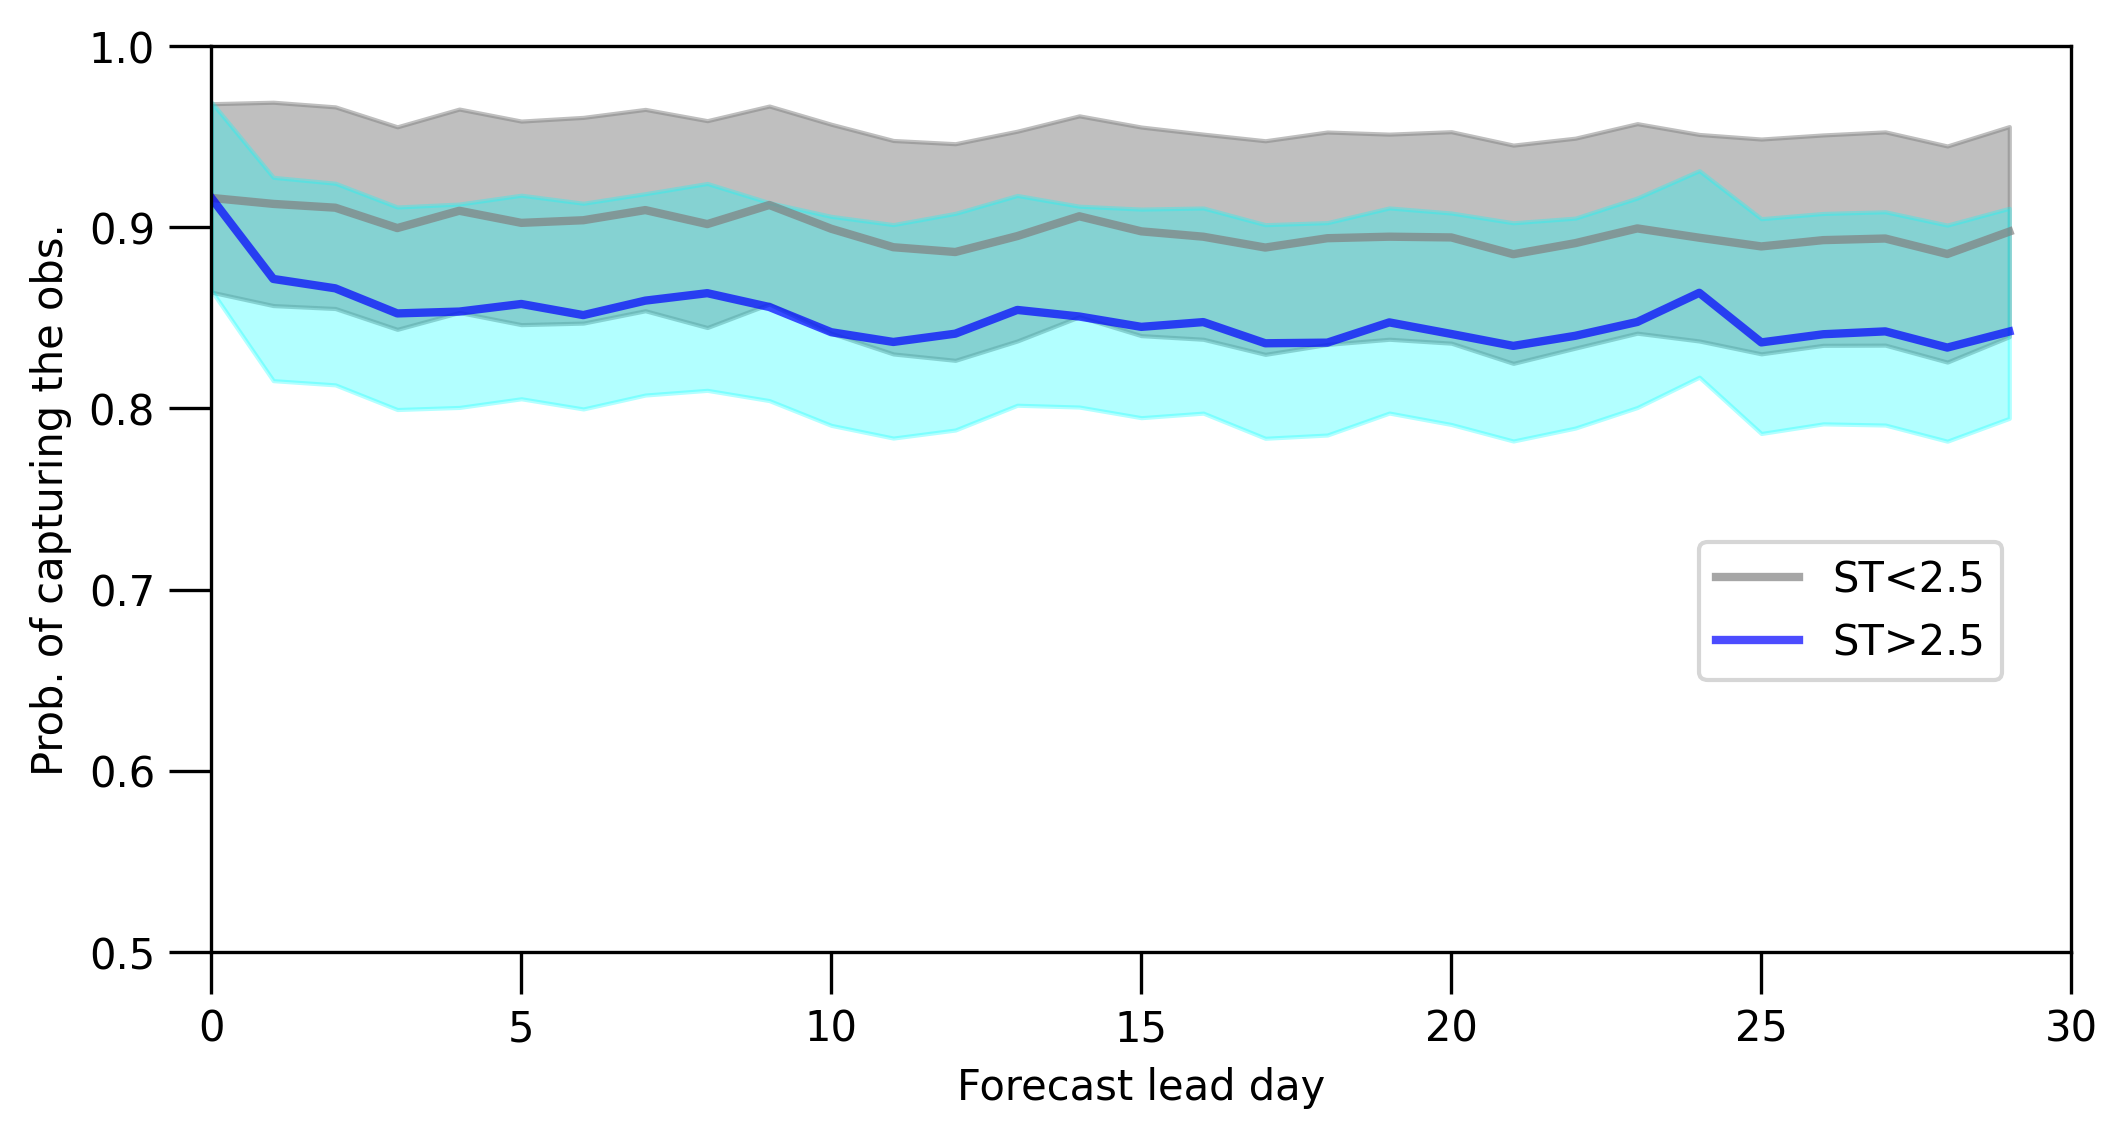

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')


fig = plt.figure(figsize=(3.54,3.54),dpi=300)
plt.plot(df1['Pred'], 'gray', linewidth=2, label='ST<2.5',alpha=0.7)
plt.plot(df3['Pred'], 'b', linewidth=2, label='ST>2.5',alpha=0.7)

plt.fill_between(df1.index, df1['prob_plus'],df1['prob_minus'],  color='gray', alpha=0.5)
plt.fill_between(df2.index, df2['prob_plus'],df2['prob_minus'],  color='cyan', alpha=0.3)

plt.legend(loc=(0.8, 0.3), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
plt.ylim(0.5, 1.0)
plt.xlim(0.0, 30.0)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)

plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
#plt.axhline(y=0.5, color='black',linewidth=1)
#plt.axvline(x=0, color='black',linewidth=1)

plt.show()
fig.savefig('fig14(b).png', bbox_inches='tight')


In [13]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_ungagued.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_gagued.csv',delimiter = ',')

df1["plus"]=df1["Pred"] +  df1["Std_err"]
df1["minus"]=df1["Pred"] -  df1["Std_err"]
#df1["plus"]=df1["Pred"] +  df1["Std"]
#df1["minus"]=df1["Pred"] -  df1["Std"]
df1[df1< 0] = 0
df1[df1>1 ] = 1


df2["plus"]=df2["Pred"] +  df2["Std_err"]
df2["minus"]=df2["Pred"] -  df2["Std_err"]
#df2["plus"]=df2["Pred"] +  df2["Std"]
#df2["minus"]=df2["Pred"] -  df2["Std"]

df2[df2< 0] = 0
df2[df2>1 ] = 1

df2

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])

df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])

In [14]:
df2

,Pred,plus,minus
0,0.828725,0.853811,0.803638
1,0.763060,0.795232,0.730888
2,0.770700,0.801788,0.739612
3,0.761205,0.793449,0.728960
4,0.758803,0.791837,0.725768
5,0.773510,0.805319,0.741701
6,0.771426,0.803882,0.738970
7,0.780994,0.812390,0.749597
8,0.785856,0.816690,0.755021
9,0.774036,0.805821,0.742252


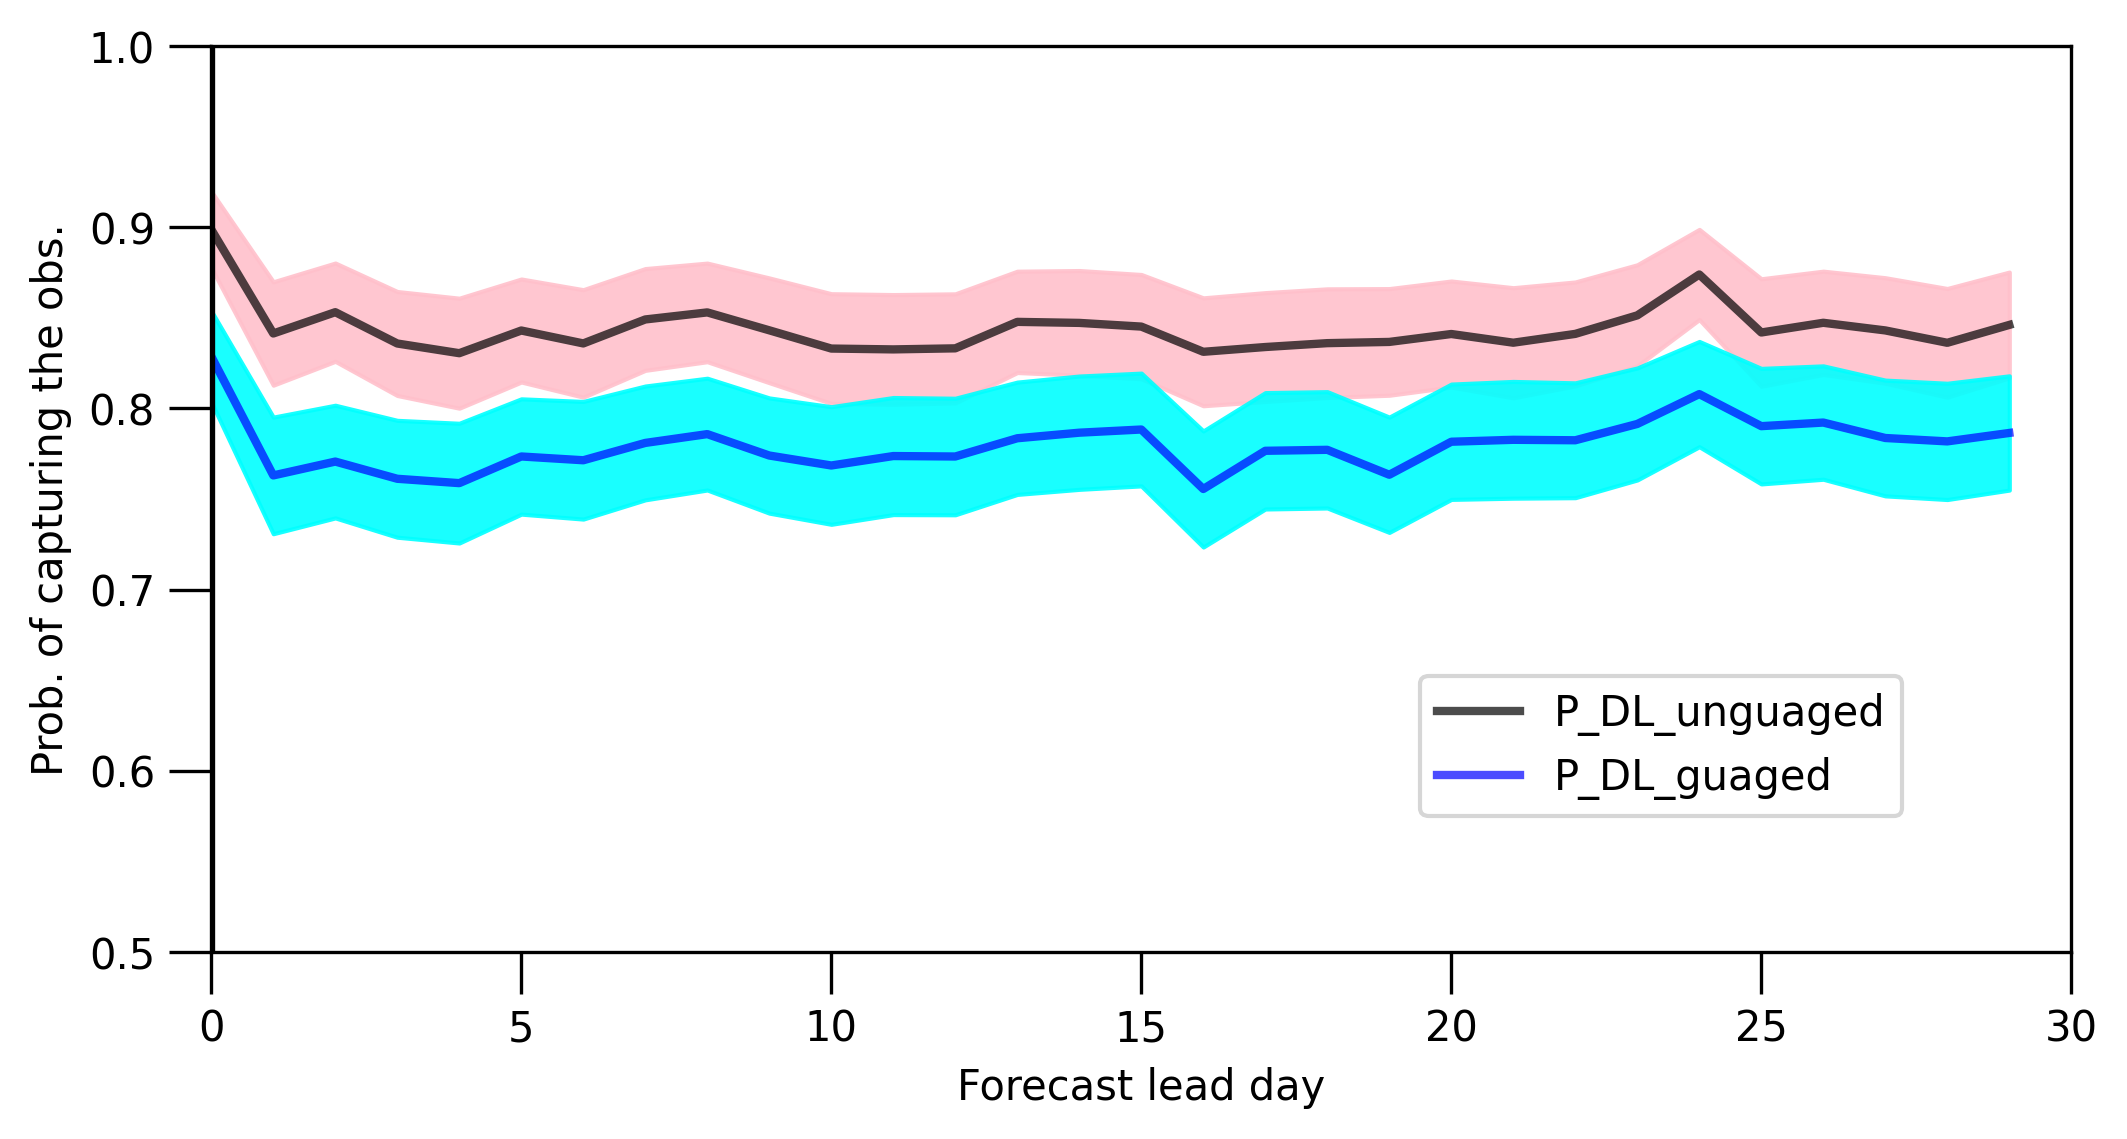

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df1['Pred'], 'k', linewidth=2, label='P_DL_unguaged',alpha=0.7)
plt.plot(df2['Pred'], 'b', linewidth=2, label='P_DL_guaged',alpha=0.7) 
plt.fill_between(df1.index, df1['plus'],df1['minus'],  color='pink', alpha=0.9)
plt.fill_between(df1.index, df2['plus'],df2['minus'],  color='cyan', alpha=0.9)


plt.axhline(y=0, color='k',linewidth=2)
plt.axvline(x=0, color='k',linewidth=2)

plt.legend(loc=(0.65, 0.15), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)
#fig.set_backgroundcolor('white')
plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
plt.ylim(0.5, 1.0)
plt.xlim(0, 30)
#plt.axhline(y=0, color='black',linewidth=1)
#plt.axvline(x=df1.index[0], color='black',linewidth=1)

plt.show()
fig.savefig('fig15.png', bbox_inches='tight')